In [587]:
from sklego.linear_model import DemographicParityClassifier

In [588]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklego.metrics import p_percent_score
from statistics import mean
from sklego.metrics import equal_opportunity_score

In [589]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [590]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklego.linear_model import EqualOpportunityClassifier

In [591]:
from sklego.preprocessing import InformationFilter
from sklearn.model_selection import RandomizedSearchCV

In [592]:
import pandas as pd

In [593]:
import numpy as np
import matplotlib.pylab as plt

In [594]:
# column names
cols = ['existing_checking', 'duration(months)', 'credit_history', 'purpose', 'credit_amount',
         'savings_account', 'employment_since', 'installment_rate', 'status_and_sex', 'other_debtors',
         'residence_since', 'property', 'age', 'other_installment_plans', 'housing',
         'existing_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'classification']

In [595]:
# load data
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", names= cols, delimiter=' ')

In [596]:
df.head(10)

,existing_checking,duration(months),credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [597]:
#df.describe()

In [598]:
# numerical features
num_features = ['credit_amount', 'duration(months)', 'installment_rate', 'residence_since', 'age',
           'existing_credits', 'people_liable']

In [599]:
# normalize data
df[num_features] = StandardScaler().fit_transform(df[num_features])

In [600]:
# categorical features
cat_features = ['existing_checking', 'credit_history', 'purpose', 'savings_account', 'employment_since',
            'other_debtors', 'property', 'other_installment_plans', 'housing', 'job',
           'telephone', 'foreign_worker']

## feature engineering attribute 9

In [601]:
# create gender column and personal_status column
df['gender'] = np.nan
df['personal_status'] = np.nan

In [602]:
# separate attribute 9 (sex_and_status) into two columns: gender, personal_status
for index, row in df.iterrows():
    if row['status_and_sex'] == 'A91':
        # male
        df.loc[index, 'gender'] = 0

        # divorced/separated
        df.loc[index, 'personal_status'] = 1

        #print('mutated row = ', df.iloc[index])
    if row['status_and_sex'] == 'A92':
        # female
        df.loc[index, 'gender'] = 1
        # divorced/separated/married
        df.loc[index, 'personal_status'] = 1

    if row['status_and_sex'] == 'A93':
        # male
        df.loc[index, 'gender'] = 0
        # single
        df.loc[index, 'personal_status'] = 0

    if row['status_and_sex'] == 'A94':
        # male
        df.loc[index, 'gender'] = 0
        # married/widowed
        df.loc[index, 'personal_status'] = 1

    if row['status_and_sex'] == 'A95':
        # female
        df.loc[index, 'gender'] = 1
        # single
        df.loc[index, 'personal_status'] = 0

In [603]:
# gain insight into the distribution of approvals for men and women
approved_men = 0
approved_women = 0
for index, row in df.iterrows():
    if row['gender'] == 0 and row['classification'] == 1:
        approved_men += 1
    if row['gender'] == 1 and row['classification'] == 1:
        approved_women += 1

In [636]:
df['gender']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
995    1.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: gender, Length: 1000, dtype: float64

In [637]:
df['personal_status']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
995    1.0
996    1.0
997    0.0
998    0.0
999    0.0
Name: personal_status, Length: 1000, dtype: float64

In [604]:
approved_men

499

In [605]:
approved_women

201

In [606]:
# NOTE: There are 3 different ways we would like to train our data,
# 1. Dataset containing all original information (including gender)
# 2. Dataset not containing gender (fairness through unawareness) for a baseline comparison
# 3. Dataset with information filter on gender column

In [607]:
# now that we've separated sex_status into two columns, we can now delete the sex_status column
#df['original_index'] = df.index
df = df.drop('status_and_sex', axis=1)
# use fairness through unawareness (dropping gender column before training) for baseline comparative model
df_unaware = df.drop('gender', axis=1)
# information filter on
df_infoFilter = df

In [608]:
# one-hot encoding each of every categorical features
df = pd.get_dummies(df, columns = cat_features)
df_unaware = pd.get_dummies(df_unaware, columns = cat_features)
df_infoFilter = pd.get_dummies(df_infoFilter, columns = cat_features)

## correlation

In [609]:
gender_corr = pd.DataFrame(df.corr(method='pearson').gender)

In [610]:
#gender_corr.sort_values(by=['gender'])

In [611]:
# define x as all columns except for last column which contains labels
x = df.drop('classification', axis = 1)
# same for baseline df
x_unaware = df_unaware.drop('classification', axis=1)

In [612]:
# information filter on gender column
x_infoFilter = InformationFilter(['gender']).fit_transform(df_infoFilter)
x_infoFilter = pd.DataFrame(x_infoFilter, columns=[n for n in df.columns if n not in ['gender']])

In [613]:
x_infoFilter = x_infoFilter.drop('classification', axis=1)

In [614]:
# replace labels with 1=good, 0=bad
df.classification.replace([1,2], [1,0], inplace=True)
y = df.classification

df_unaware.classification.replace([1,2], [1,0], inplace=True)
y_unaware = df_unaware.classification

In [615]:
# 80/20 split for train/test, which is used to compute p_percent_score
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

xtrain_infoFilter, xtest_infoFilter, ytrain_infoFilter, ytest_infoFilter = train_test_split(x_infoFilter, y, test_size = 0.2, random_state = 0)

xtrain_unaware, xtest_unware, ytrain_unaware, ytest_unware = train_test_split(x_unaware, y_unaware, test_size = 0.2, random_state = 0)

In [616]:
#xtrain.columns

In [617]:
# define cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [618]:
# model evaluation metrics 
f2 = make_scorer(fbeta_score, beta=2)
mean_accuracy=[]
mean_f2=[]
mean_precision=[]
mean_recall=[]
accuracy_std=[]
p_percents=[]
equal_opp=[]

In [619]:
# baseline model evaluation metrics
f2_unaware = make_scorer(fbeta_score, beta=2)
mean_accuracy_unaware=[]
mean_f2_unaware=[]
mean_precision_unaware=[]
mean_recall_unaware=[]
accuracy_std_unaware=[]
p_percents_unaware=[]
equal_opp_unaware=[]

In [620]:
# information filter model evaluation metrics
f2_infoFilter = make_scorer(fbeta_score, beta=2)
mean_accuracy_infoFilter=[]
mean_f2_infoFilter=[]
mean_precision_infoFilter=[]
mean_recall_infoFilter=[]
accuracy_std_infoFilter=[]
p_percents_infoFilter=[]
equal_opp_infoFilter=[]

In [621]:
# classifiers
classifiers=['Logistic Regression', 'Demographic Parity Cov_Threshold=1', 'Demographic Parity Cov_Threshold=0.0000069', 'Equal Opportunity']
models=[LogisticRegression(max_iter=5000), DemographicParityClassifier(sensitive_cols="gender", covariance_threshold=1), DemographicParityClassifier(sensitive_cols="gender", covariance_threshold=0.0000069), EqualOpportunityClassifier(sensitive_cols="gender", covariance_threshold=0.0000069, positive_target=True,)]


In [622]:
for model in models:
    # accuracy
    cv_accuracy = cross_val_score(model,x,y,scoring = "accuracy", cv = cv, n_jobs=-1)
    # f2beta
    cv_f2 = cross_val_score(model, x, y, scoring=f2, cv=cv, n_jobs=-1)
    # precision
    cv_precision = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1)
    # recall
    cv_recall = cross_val_score(model, x, y, scoring='recall', cv=cv, n_jobs=-1)
    #p% 
    model.fit(xtrain, ytrain)
    p_percent = p_percent_score(sensitive_column="gender")(model, xtrain, ytrain)
    equal_opp_score = equal_opportunity_score(sensitive_column="gender")(model, xtrain, ytrain)


    mean_accuracy.append(mean(cv_accuracy))
    accuracy_std.append(cv_accuracy.std())
    mean_f2.append(mean(cv_f2))
    mean_precision.append(mean(cv_precision))
    mean_recall.append(mean(cv_recall))
    p_percents.append(p_percent)
    equal_opp.append(equal_opp_score)

In [623]:
models_dataframe=pd.DataFrame({'Mean Accuracy':mean_accuracy, 'Accuracy Std':accuracy_std, 'Mean f2beta': mean_f2, 'Mean precision':mean_precision, 'Mean recall':mean_recall, 'P%':p_percents, 'Equal Opp Score':equal_opp},index=classifiers)

In [624]:
# classifiers for information filter and fairness through unawareness evaluation 
classifiers_=['Logistic Regression']
models_ = models=[LogisticRegression(max_iter=5000)]

In [625]:
for model in models_:
    # accuracy
    cv_accuracy = cross_val_score(model,x_infoFilter,y,scoring = "accuracy", cv = cv, n_jobs=-1)
    # f2beta
    cv_f2 = cross_val_score(model, x_infoFilter, y, scoring=f2, cv=cv, n_jobs=-1)
    # precision
    cv_precision = cross_val_score(model, x_infoFilter, y, scoring='precision', cv=cv, n_jobs=-1)
    # recall
    cv_recall = cross_val_score(model, x_infoFilter, y, scoring='recall', cv=cv, n_jobs=-1)


    mean_accuracy_infoFilter.append(mean(cv_accuracy))
    accuracy_std_infoFilter.append(cv_accuracy.std())
    mean_f2_infoFilter.append(mean(cv_f2))
    mean_precision_infoFilter.append(mean(cv_precision))
    mean_recall_infoFilter.append(mean(cv_recall))

In [626]:
models_dataframe_infoFilter=pd.DataFrame({'Information filter Mean Accuracy':mean_accuracy_infoFilter, 'Information filter Accuracy Std':accuracy_std_infoFilter, 'Information filter Mean f2beta': mean_f2_infoFilter, 'Information filter Mean precision':mean_precision_infoFilter, 'Information filter Mean recall':mean_recall_infoFilter},index=classifiers_)

In [627]:
# baseline comparision (fairness through unawareness)

for model in models_:
    # accuracy
    cv_accuracy_unaware = cross_val_score(model,x_unaware,y_unaware,scoring = "accuracy", cv = cv, n_jobs=-1)
    # f2beta
    cv_f2_unaware = cross_val_score(model, x_unaware, y_unaware, scoring=f2, cv=cv, n_jobs=-1)
    # precision
    cv_precision_unaware = cross_val_score(model, x_unaware, y_unaware, scoring='precision', cv=cv, n_jobs=-1)
    # recall
    cv_recall_unaware = cross_val_score(model, x_unaware, y_unaware, scoring='recall', cv=cv, n_jobs=-1)
    
    
    mean_accuracy_unaware.append(mean(cv_accuracy_unaware))
    accuracy_std_unaware.append(cv_accuracy_unaware.std())
    mean_f2_unaware.append(mean(cv_f2_unaware))
    mean_precision_unaware.append(mean(cv_precision_unaware))
    mean_recall_unaware.append(mean(cv_recall_unaware))

In [628]:
models_dataframe_unaware=pd.DataFrame({'Baseline Mean Accuracy':mean_accuracy_unaware, 'Baseline Accuracy Std':accuracy_std_unaware, 'Baseline Mean f2beta': mean_f2_unaware, 'Baseline Mean Precision':mean_precision_unaware, 'Baseline Mean recall':mean_recall_unaware},index=classifiers_)

## Results

In [629]:
# results for models training using original dataset (gender column included)
models_dataframe

,Mean Accuracy,Accuracy Std,Mean f2beta,Mean precision,Mean recall,P%,Equal Opp Score
Logistic Regression,0.761000,0.031660,0.861042,0.800754,0.878095,0.889475,0.928817
Demographic Parity Cov_Threshold=1,0.760667,0.033460,0.860040,0.801215,0.876667,0.881497,0.931334
Demographic Parity Cov_Threshold=0.0000069,0.756000,0.031581,0.856983,0.797557,0.873810,0.984322,0.952970
Equal Opportunity,0.752667,0.033559,0.852824,0.796853,0.868571,0.991190,0.958265


In [630]:
# results for model trained using information filter on gender
# TODO: figure out how to calculate p % score when training log reg with information filter on gender
models_dataframe_infoFilter

,Information filter Mean Accuracy,Information filter Accuracy Std,Information filter Mean f2beta,Information filter Mean precision,Information filter Mean recall
Logistic Regression,0.760667,0.030977,0.860956,0.80043,0.878095


In [631]:
# results for model trained without gender column (fairness through unawareness), intended as a baseline comparison
# TODO: figure out how to calculate p % score when training log reg without gender column
models_dataframe_unaware

,Baseline Mean Accuracy,Baseline Accuracy Std,Baseline Mean f2beta,Baseline Mean Precision,Baseline Mean recall
Logistic Regression,0.76,0.032558,0.860187,0.800209,0.877143


## Exploration of covariance threshold: Demographic Parity Classifier 

In [632]:
grid_dpc = GridSearchCV(estimator=dpc_clf, param_grid={"estimator__covariance_threshold":np.linspace(0, 1.00, 20)}, cv=5, return_train_score=True, refit="p_percent_score", scoring={"p_percent_score":p_percent_score('gender'), "accuracy_score":make_scorer(accuracy_score)})

In [633]:
grid_dpc.fit(x,y)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=_DemographicParityClassifier(covariance_threshold=1,
                                                                                  sensitive_cols='gender'),
                                           n_jobs=1),
             param_grid={'estimator__covariance_threshold': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             refit='p_percent_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'p_percent_score': <function p_percent_score.<locals>.impl at 0x7fe77893a940>})

In [634]:
results_dpc = (pd.DataFrame(grid_dpc.cv_results_).set_index("param_estimator__covariance_threshold"))

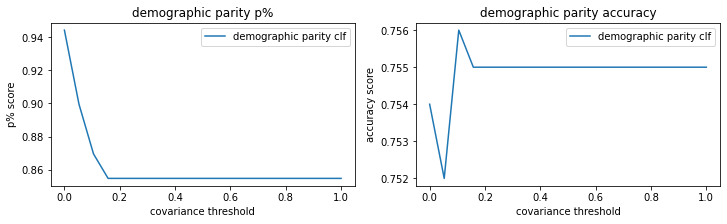

In [635]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(np.array(results_dpc.index), results_dpc['mean_test_p_percent_score'], label='demographic parity clf')
plt.xlabel("covariance threshold")
plt.ylabel('p% score')
plt.legend()
plt.title("demographic parity p%")
plt.subplot(122)
plt.plot(np.array(results_dpc.index), results_dpc['mean_test_accuracy_score'], label='demographic parity clf')
plt.xlabel("covariance threshold")
plt.ylabel('accuracy score')
plt.legend()
plt.title("demographic parity accuracy");


In [504]:
# NOTE: it's clear that p% is influenced by covariance threshold for dpc model. 
# Thus, it would be interesting to explore how feature coefficients change as covariance threshold changes

## Exploration of how feature coefficients change as a function of covariance threshold

In [505]:
#cov_threshold = np.linspace(0,1,10)
#accuracy_ = []
#p_percent_ = []
#coefficients_ = 
#cv_ = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [565]:
#for cov in cov_threshold:
    #model = DemographicParityClassifier(sensitive_cols="gender", covariance_threshold=cov)
    #model.fit(xtrain, ytrain)
    # calculate accuracy
    #accuracy_.append(model.score(xtest,ytest))
    # calculate p percent score
    #p_percent = p_percent_score(sensitive_column="gender")(model, xtrain, ytrain)
    #p_percent_.append(p_percent)
    # store coefficients
    #coefficients_.append(model.coef_)

In [ ]:
#cov_threshold_df = pd.DataFrame()

## Exploration of regularization (elasticnet mixing parameter): Logisitic Regression

In [ ]:
# NOTE: I would like to explore how p% changes with different lambda values 
# (lambda value is represented as 'C' parameter in scikit learn's logistic regression model) when using L1 regularization
# vs using L2 regularization vs using elasticnet with different mixing parameters

In [576]:
log_clf = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=2000, random_state=0)

In [577]:
grid_values = {'l1_ratio':np.linspace(0,1,30), 'random_state':[0]}

In [578]:
grid_log = GridSearchCV(estimator=log_clf, param_grid=grid_values, cv=5, return_train_score=True, refit="accuracy_score", scoring={"p_percent_score":p_percent_score('gender'), "accuracy_score":make_scorer(accuracy_score)})

In [579]:
grid_log.fit(x,y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, penalty='elasticnet',
                                          random_state=0, solver='saga'),
             param_grid={'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'random_state': [0]},
             refit='accuracy_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'p_percent_score': <function p_percent_score.<locals>.impl at 0x7fe7b05ed430>})

In [580]:
results_log = (pd.DataFrame(grid_log.cv_results_).set_index("param_l1_ratio"))

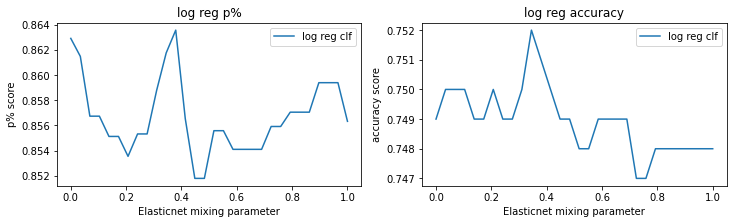

In [581]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(np.array(results_log.index), results_log['mean_test_p_percent_score'], label='log reg clf')
plt.xlabel("Elasticnet mixing parameter")
plt.ylabel('p% score')
plt.legend()
plt.title("log reg p%")
plt.subplot(122)
plt.plot(np.array(results_log.index), results_log['mean_test_accuracy_score'], label='log reg clf')
plt.xlabel("Elasticnet mixing parameter")
plt.ylabel('accuracy score')
plt.legend()
plt.title("log reg accuracy");

## Hyperparameter exploration: Equal Opportunity Classifier 

In [57]:
equal_opp_clf = EqualOpportunityClassifier(sensitive_cols="gender", covariance_threshold=0.5, positive_target=True,)

In [58]:
grid_eq = GridSearchCV(estimator=equal_opp_clf, param_grid={"estimator__covariance_threshold":np.linspace(0, 1.00, 20)}, cv=5, refit="equal_opportunity_score", return_train_score=True, scoring={"equal_opportunity_score":equal_opportunity_score('gender'), "accuracy_score":make_scorer(accuracy_score)})

In [59]:
grid_eq.fit(x,y)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=_EqualOpportunityClassifier(covariance_threshold=0.5,
                                                                                 positive_target=True,
                                                                                 sensitive_cols='gender'),
                                           n_jobs=1),
             param_grid={'estimator__covariance_threshold': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526...363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])},
             refit='equal_opportunity_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'equal_opportunity_score': <function equal_opportunit

In [60]:
results_eq = (pd.DataFrame(grid_eq.cv_results_).set_index("param_estimator__covariance_threshold"))

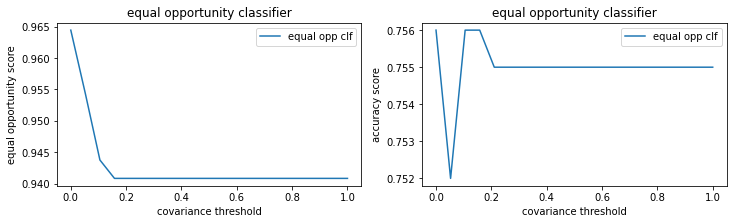

In [61]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(np.array(results_eq.index), results_eq['mean_test_equal_opportunity_score'], label='equal opp clf')
plt.xlabel("covariance threshold")
plt.ylabel("equal opportunity score")
plt.legend()
plt.title("equal opportunity classifier")
plt.subplot(122)
plt.plot(np.array(results_eq.index), results_eq['mean_test_accuracy_score'], label='equal opp clf')
plt.xlabel("covariance threshold")
plt.ylabel('accuracy score')
plt.legend()
plt.title("equal opportunity classifier");